In [72]:
import os
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import manifold
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from scipy.linalg import norm
%matplotlib nbagg
plt.rcParams["figure.figsize"] = (8,6)

In [41]:
def get_path(person, number):
    filepath = os.path.join('s{}'.format(person), '{}.pgm'.format(number))
    return filepath

In [3]:
def load_image(filepath):
    im = Image.open(filepath)
    return im

In [4]:
def show_image(im):
    fig1, ax1 = plt.subplots(1, 1)
    ax1.imshow(im, cmap = 'gray');
    return

In [6]:
people = 41
numbers = 11
ims = np.empty((400,10304)) #400 images of size 92*112
i = 0
for person in range(1, people):
    for number in range(1, numbers):
        filepath = get_path(person, number)
        im = load_image(filepath)
        im_pro = np.array(im).ravel().astype(float)
        ims[i] = im_pro
        i += 1

In [43]:
iso = manifold.Isomap(n_neighbors=2, n_components=3)
Z = iso.fit_transform(ims) #Z is in the projected dimensions.
Z.shape

(400, 3)

In [44]:
from sklearn.multioutput import MultiOutputRegressor
import sklearn
from sklearn.tree import ExtraTreeRegressor

In [53]:
lin = sklearn.tree.ExtraTreeRegressor(max_depth=19)
#lin = MultiOutputRegressor(svc)
lin.fit(Z, ims)

ExtraTreeRegressor(criterion='mse', max_depth=19, max_features='auto',
          max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

In [54]:
lin.score(Z, ims)

0.7382989615155412

In [149]:
norm_vary = list()
norm_im = list()
lbd = np.linspace(0, 1, 101)
for i in range(101):
    test = (lbd[i] * Z[person1]) + ((1-lbd[i]) * Z[person2])
    norm_vary.append(norm(test))
    pred = lin.predict(test.reshape(1, -1))
    im = Image.fromarray(pred.reshape((112, 92)))
    norm_im.append(norm(im))
    im = im.convert('RGB')
    im.save('{}.png'.format(i))

In [151]:
os.system("ffmpeg -f image2 -r 20 -i ./%01d.png -vcodec mpeg4 -y ./swissGenevaLake.mp4")

0

<IPython.core.display.Javascript object>


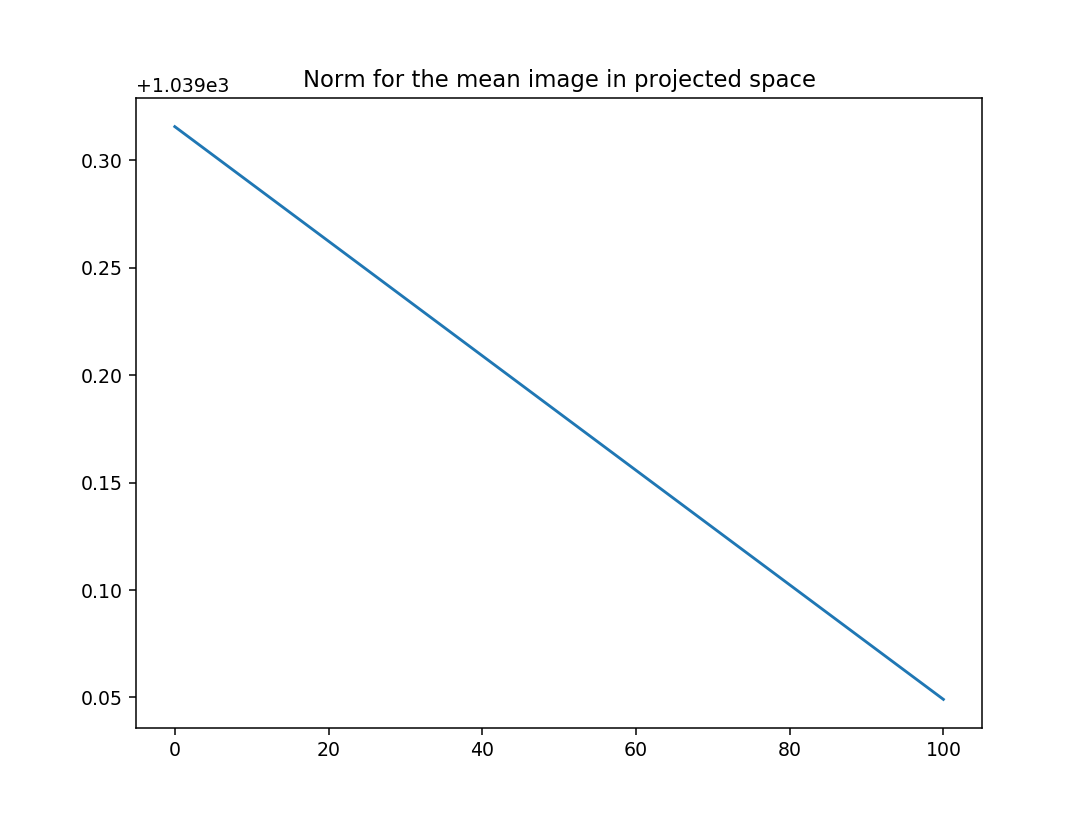

In [136]:
f, ax = plt.subplots(1,1)
ax.plot(norm_vary)
ax.set_title('Norm for the mean image in projected space')

<IPython.core.display.Javascript object>


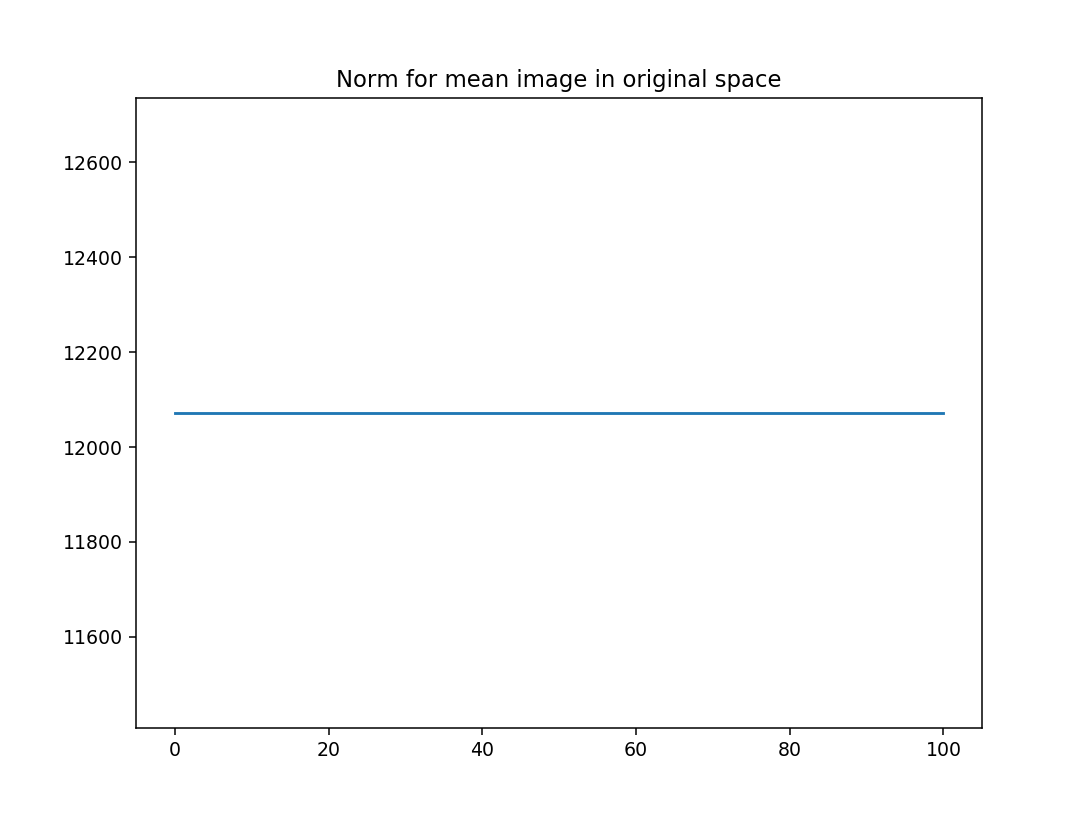

In [150]:
f, ax = plt.subplots(1,1)
ax.plot(norm_im)
ax.set_title('Norm for mean image in original space')

## So, the discontinuity in final video is not because of the projection but because of the reconstructing method. 

In [127]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5 ,hidden_layer_sizes=(1000, 5000), random_state=1)

### The training for ETR is stochastic. So, train a few number of times for the same hyperparameter and choose the best model

In [152]:
trials = 10
models = list()
scores= list()
from tqdm import tqdm
for i in tqdm(range(trials)):
    lin = sklearn.tree.ExtraTreeRegressor(max_depth=19)
    lin.fit(Z, ims)
    models.append(lin)
    scores.append(lin.score(Z, ims))
print('Best model is ',np.argmax(scores),'with score', np.max(scores))
lin = models[np.argmax(scores)]



  0%|                                                   | 0/10 [00:00<?, ?it/s]

 10%|████▎                                      | 1/10 [00:04<00:38,  4.28s/it]

 20%|████████▌                                  | 2/10 [00:07<00:31,  3.95s/it]

 30%|████████████▉                              | 3/10 [00:11<00:27,  3.92s/it]

 40%|█████████████████▏                         | 4/10 [00:16<00:24,  4.14s/it]

 50%|█████████████████████▌                     | 5/10 [00:21<00:21,  4.25s/it]

 60%|█████████████████████████▊                 | 6/10 [00:26<00:17,  4.48s/it]

 70%|██████████████████████████████             | 7/10 [00:30<00:13,  4.35s/it]

 80%|██████████████████████████████████▍        | 8/10 [00:35<00:08,  4.42s/it]

 90%|██████████████████████████████████████▋    | 9/10 [00:40<00:04,  4.50s/it]

100%|██████████████████████████████████████████| 10/10 [00:45<00:00,  4.58s/it]



Best model is  3 with score 0.954223248371


## So, the reconstruction regressor is overfitting.

<IPython.core.display.Javascript object>


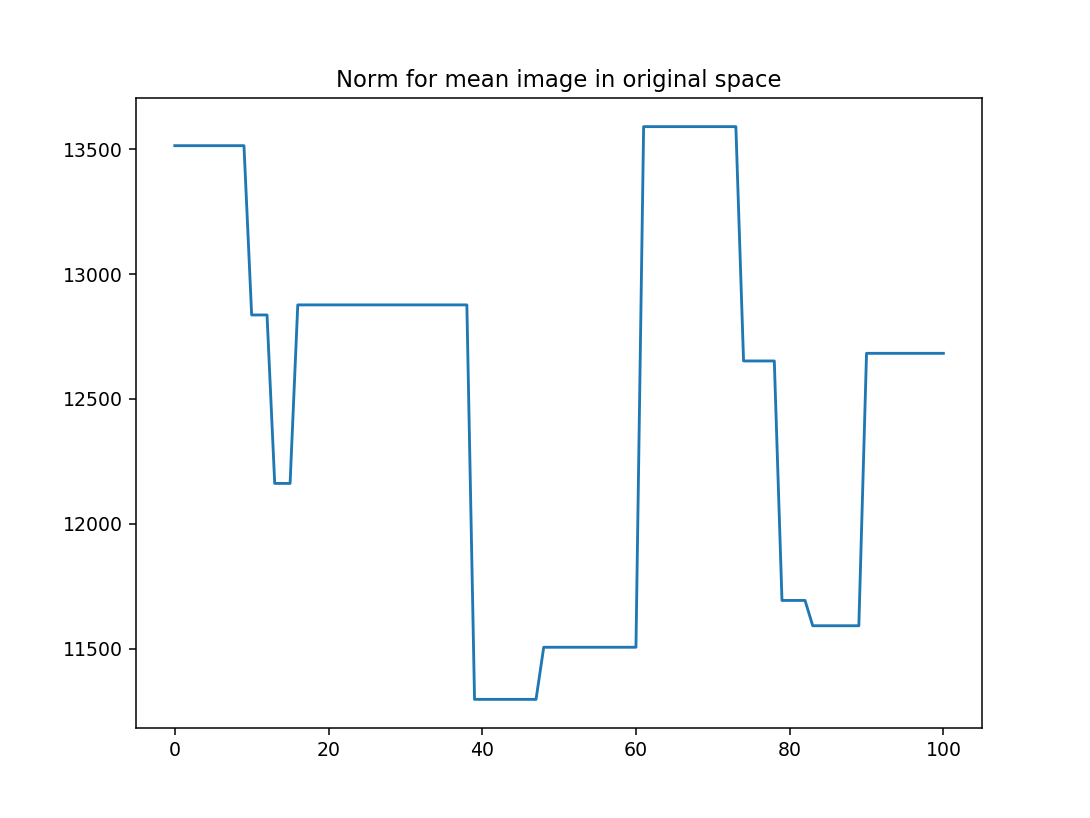

In [153]:
norm_vary = list()
norm_im = list()
lbd = np.linspace(0, 1, 101)
for i in range(101):
    test = (lbd[i] * Z[person1]) + ((1-lbd[i]) * Z[person2])
    norm_vary.append(norm(test))
    pred = lin.predict(test.reshape(1, -1))
    im = Image.fromarray(pred.reshape((112, 92)))
    norm_im.append(norm(im))
f, ax = plt.subplots(1,1)
ax.plot(norm_im)
ax.set_title('Norm for mean image in original space')

## Still Overfitting

In [154]:
trials = 10
models = list()
scores= list()
from tqdm import tqdm
for i in tqdm(range(trials)):
    lin = sklearn.tree.ExtraTreeRegressor(max_depth=16)
    lin.fit(Z, ims)
    models.append(lin)
    scores.append(lin.score(Z, ims))
print('Best model is ',np.argmax(scores),'with score', np.max(scores))
lin = models[np.argmax(scores)]



  0%|                                                   | 0/10 [00:00<?, ?it/s]

 10%|████▎                                      | 1/10 [00:03<00:31,  3.46s/it]

 20%|████████▌                                  | 2/10 [00:06<00:26,  3.30s/it]

 30%|████████████▉                              | 3/10 [00:09<00:23,  3.30s/it]

 40%|█████████████████▏                         | 4/10 [00:12<00:19,  3.19s/it]

 50%|█████████████████████▌                     | 5/10 [00:16<00:16,  3.22s/it]

 60%|█████████████████████████▊                 | 6/10 [00:19<00:12,  3.22s/it]

 70%|██████████████████████████████             | 7/10 [00:21<00:09,  3.09s/it]

 80%|██████████████████████████████████▍        | 8/10 [00:24<00:06,  3.09s/it]

 90%|██████████████████████████████████████▋    | 9/10 [00:28<00:03,  3.11s/it]

100%|██████████████████████████████████████████| 10/10 [00:31<00:00,  3.13s/it]



Best model is  4 with score 0.67323422166


<IPython.core.display.Javascript object>


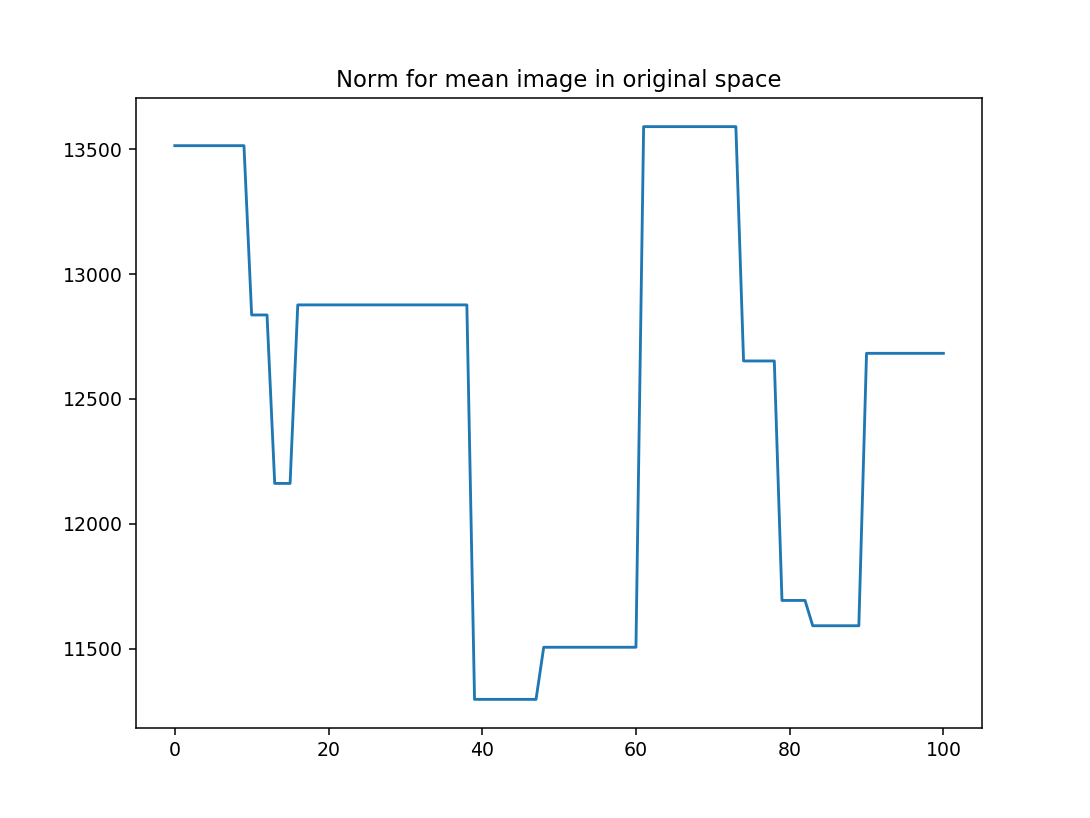

In [155]:
f, ax = plt.subplots(1,1)
ax.plot(norm_im)
ax.set_title('Norm for mean image in original space')

## Thersholded? 

What we need is a smooth upwards or downwards trend in the norm of the reconstructed image.



  0%|                                                   | 0/10 [00:00<?, ?it/s]

 10%|████▎                                      | 1/10 [00:02<00:25,  2.89s/it]

 20%|████████▌                                  | 2/10 [00:05<00:20,  2.62s/it]

 30%|████████████▉                              | 3/10 [00:08<00:19,  2.78s/it]

 40%|█████████████████▏                         | 4/10 [00:10<00:16,  2.73s/it]

 50%|█████████████████████▌                     | 5/10 [00:13<00:13,  2.73s/it]

 60%|█████████████████████████▊                 | 6/10 [00:16<00:10,  2.72s/it]

 70%|██████████████████████████████             | 7/10 [00:19<00:08,  2.85s/it]

 80%|██████████████████████████████████▍        | 8/10 [00:23<00:05,  2.89s/it]

 90%|██████████████████████████████████████▋    | 9/10 [00:26<00:02,  2.91s/it]

100%|██████████████████████████████████████████| 10/10 [00:28<00:00,  2.89s/it]



Best model is  2 with score 0.547620460571


<IPython.core.display.Javascript object>


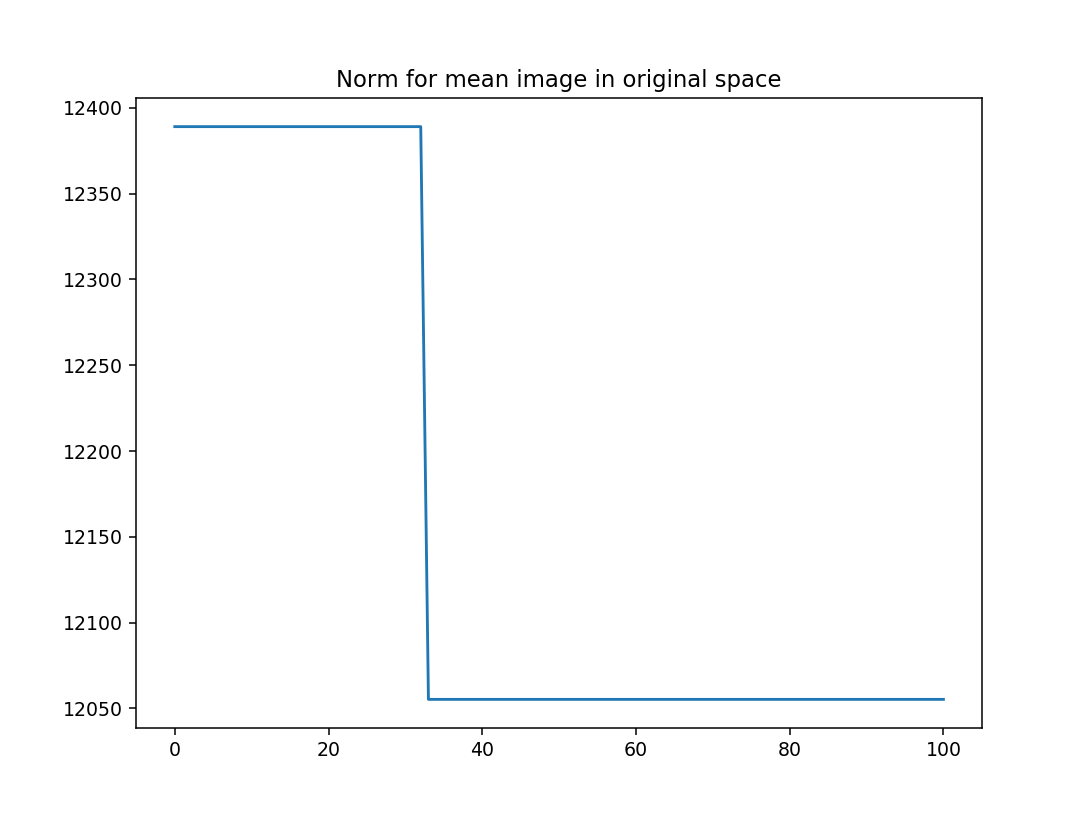

In [156]:
#Training the model
trials = 10
models = list()
scores= list()
from tqdm import tqdm
for i in tqdm(range(trials)):
    lin = sklearn.tree.ExtraTreeRegressor(max_depth=12)
    lin.fit(Z, ims)
    models.append(lin)
    scores.append(lin.score(Z, ims))
print('Best model is ',np.argmax(scores),'with score', np.max(scores))
lin = models[np.argmax(scores)]

#Reconstructing 100 intermediate points and plotting the norm
norm_vary = list()
norm_im = list()
lbd = np.linspace(0, 1, 101)
for i in range(101):
    test = (lbd[i] * Z[person1]) + ((1-lbd[i]) * Z[person2])
    norm_vary.append(norm(test))
    pred = lin.predict(test.reshape(1, -1))
    im = Image.fromarray(pred.reshape((112, 92)))
    norm_im.append(norm(im))
f, ax = plt.subplots(1,1)
ax.plot(norm_im)
ax.set_title('Norm for mean image in original space')



  0%|                                                   | 0/10 [00:00<?, ?it/s]

 10%|████▎                                      | 1/10 [00:03<00:28,  3.12s/it]

 20%|████████▌                                  | 2/10 [00:05<00:22,  2.79s/it]

 30%|████████████▉                              | 3/10 [00:08<00:20,  2.94s/it]

 40%|█████████████████▏                         | 4/10 [00:11<00:17,  2.96s/it]

 50%|█████████████████████▌                     | 5/10 [00:15<00:15,  3.05s/it]

 60%|█████████████████████████▊                 | 6/10 [00:18<00:12,  3.10s/it]

 70%|██████████████████████████████             | 7/10 [00:21<00:09,  3.12s/it]

 80%|██████████████████████████████████▍        | 8/10 [00:24<00:06,  3.10s/it]

 90%|██████████████████████████████████████▋    | 9/10 [00:28<00:03,  3.13s/it]

100%|██████████████████████████████████████████| 10/10 [00:32<00:00,  3.20s/it]



Best model is  3 with score 0.608422851405


<IPython.core.display.Javascript object>


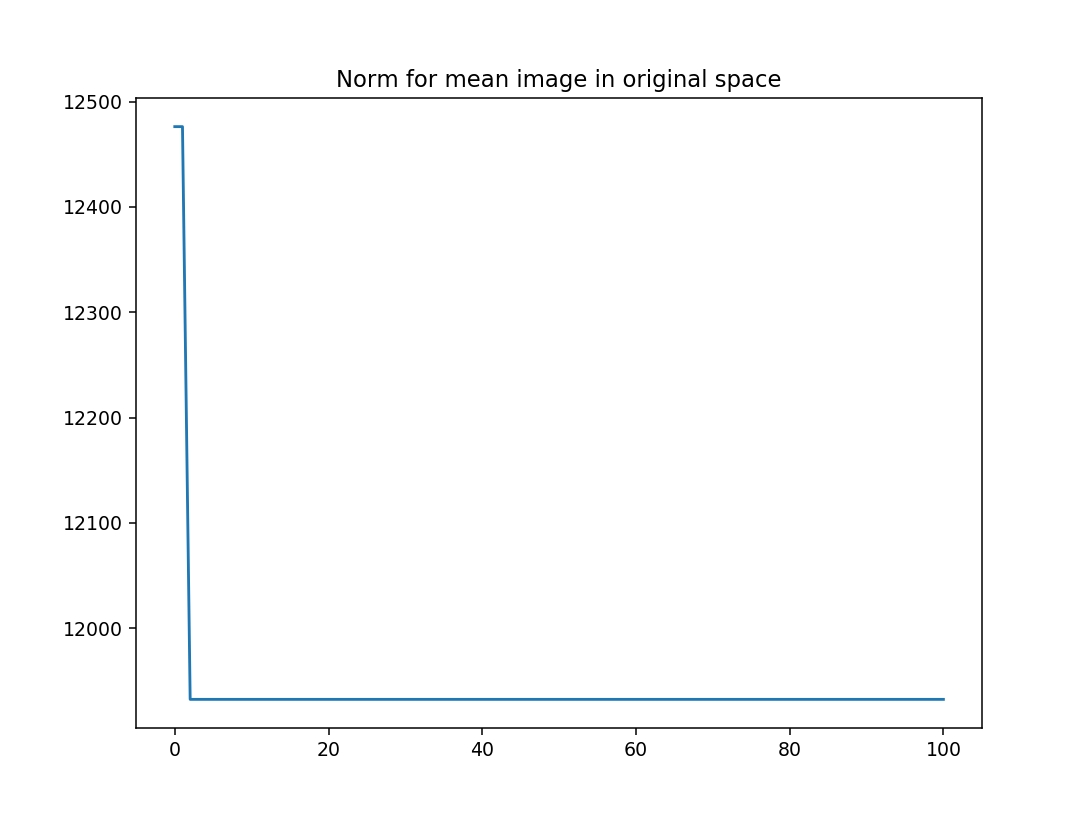

In [157]:
#Training the model
trials = 10
models = list()
scores= list()
from tqdm import tqdm
for i in tqdm(range(trials)):
    lin = sklearn.tree.ExtraTreeRegressor(max_depth=14)
    lin.fit(Z, ims)
    models.append(lin)
    scores.append(lin.score(Z, ims))
print('Best model is ',np.argmax(scores),'with score', np.max(scores))
lin = models[np.argmax(scores)]

#Reconstructing 100 intermediate points and plotting the norm
norm_vary = list()
norm_im = list()
lbd = np.linspace(0, 1, 101)
for i in range(101):
    test = (lbd[i] * Z[person1]) + ((1-lbd[i]) * Z[person2])
    norm_vary.append(norm(test))
    pred = lin.predict(test.reshape(1, -1))
    im = Image.fromarray(pred.reshape((112, 92)))
    norm_im.append(norm(im))
f, ax = plt.subplots(1,1)
ax.plot(norm_im)
ax.set_title('Norm for mean image in original space')

## Underfitting :(




  0%|                                                   | 0/10 [00:00<?, ?it/s]

 10%|████▎                                      | 1/10 [00:03<00:33,  3.76s/it]

 20%|████████▌                                  | 2/10 [00:06<00:27,  3.39s/it]

 30%|████████████▉                              | 3/10 [00:09<00:21,  3.10s/it]

 40%|█████████████████▏                         | 4/10 [00:11<00:17,  2.89s/it]

 50%|█████████████████████▌                     | 5/10 [00:14<00:14,  2.82s/it]

 60%|█████████████████████████▊                 | 6/10 [00:16<00:11,  2.80s/it]

 70%|██████████████████████████████             | 7/10 [00:19<00:08,  2.74s/it]

 80%|██████████████████████████████████▍        | 8/10 [00:21<00:05,  2.70s/it]

 90%|██████████████████████████████████████▋    | 9/10 [00:24<00:02,  2.75s/it]

100%|██████████████████████████████████████████| 10/10 [00:27<00:00,  2.72s/it]



Best model is  8 with score 0.597498935261


<IPython.core.display.Javascript object>


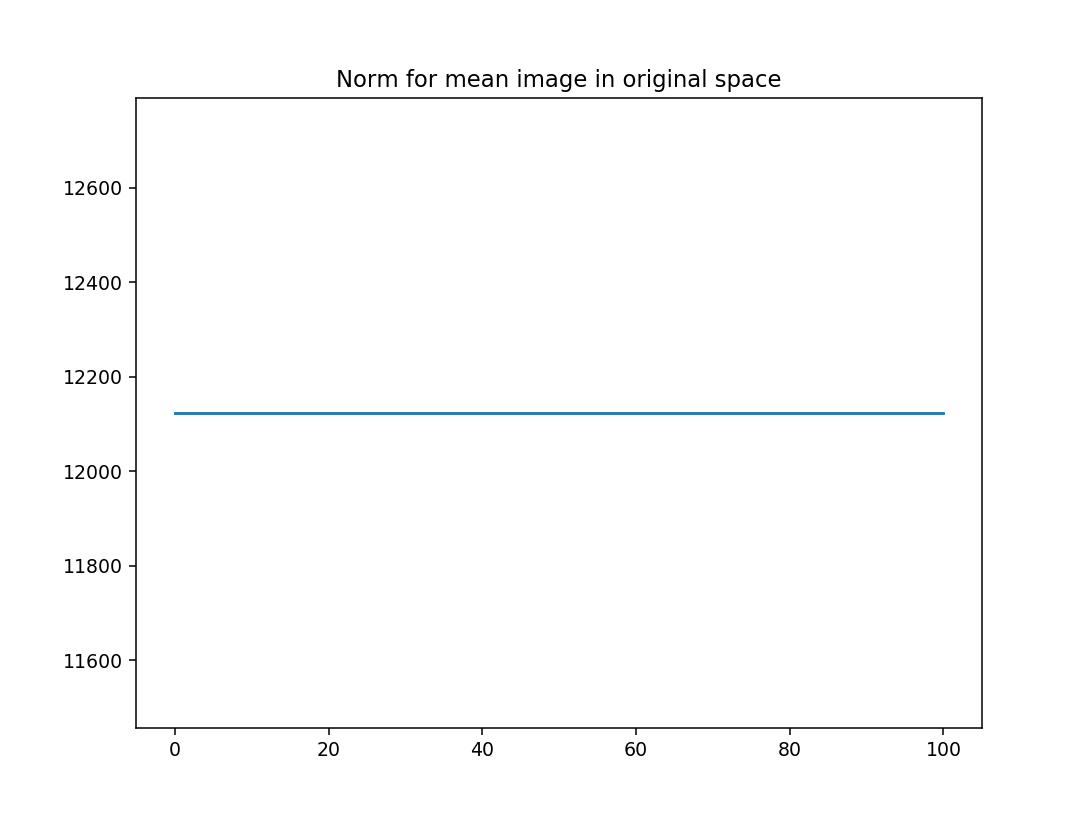

In [158]:
#Training the model
trials = 10
models = list()
scores= list()
from tqdm import tqdm
for i in tqdm(range(trials)):
    lin = sklearn.tree.ExtraTreeRegressor(max_depth=15)
    lin.fit(Z, ims)
    models.append(lin)
    scores.append(lin.score(Z, ims))
print('Best model is ',np.argmax(scores),'with score', np.max(scores))
lin = models[np.argmax(scores)]

#Reconstructing 100 intermediate points and plotting the norm
norm_vary = list()
norm_im = list()
lbd = np.linspace(0, 1, 101)
for i in range(101):
    test = (lbd[i] * Z[person1]) + ((1-lbd[i]) * Z[person2])
    norm_vary.append(norm(test))
    pred = lin.predict(test.reshape(1, -1))
    im = Image.fromarray(pred.reshape((112, 92)))
    norm_im.append(norm(im))
f, ax = plt.subplots(1,1)
ax.plot(norm_im)
ax.set_title('Norm for mean image in original space')